# Visualization


In this notebook, we show some of the plotting functions for property models and embedding models.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from pepme.models import Charge, Concatenate, Esm2, Esm2Checkpoint, Gravy, MolecularWeight
from pepme.models.normalizers import MinMaxNorm
from pepme.models.plots import plot_hist, plot_kde, plot_pca, plot_tsne, plot_umap, plot_violin
from pepme.utils import random_subset, read_fasta_file

## Property visualization


Let's start by loading some sequences.


In [ ]:
DATASET_PATH = "./data/amp-diffusion.fasta"

In [ ]:
sequences = read_fasta_file(DATASET_PATH)

Let's create a histogram, kde and violin plot for a few properties.


In [ ]:
properties = {"Gravy": Gravy(), "Molecular Weight": MolecularWeight()}

In [ ]:
df = pd.DataFrame({name: prop(sequences) for name, prop in properties.items()})

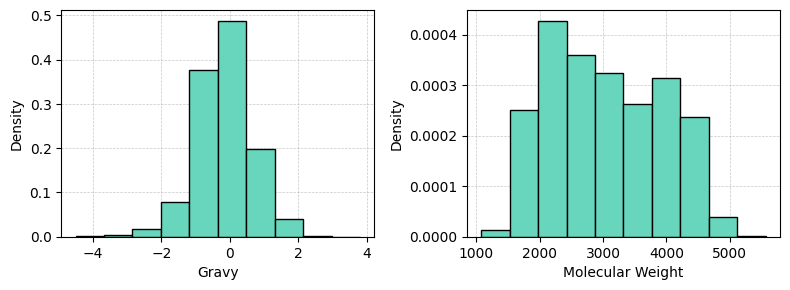

In [ ]:
per_ax_size = (4, 3)
n = len(properties)
fig, axes = plt.subplots(ncols=n, figsize=(per_ax_size[0] * n, per_ax_size[1]))

for i in range(len(axes)):
    col_name = df.columns[i]
    col = df[col_name]
    plot_hist(col.to_numpy(), xlabel=col_name, ax=axes[i])

fig.tight_layout()

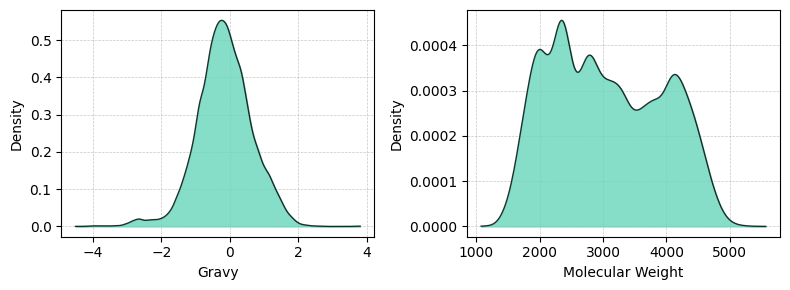

In [ ]:
per_ax_size = (4, 3)
n = len(properties)
fig, axes = plt.subplots(ncols=n, figsize=(per_ax_size[0] * n, per_ax_size[1]))

for i in range(len(axes)):
    col_name = df.columns[i]
    col = df[col_name]
    plot_kde(col.to_numpy(), xlabel=col_name, ax=axes[i])

fig.tight_layout()

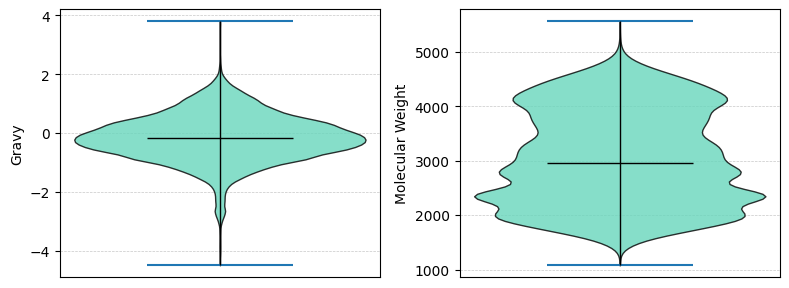

In [ ]:
per_ax_size = (4, 3)
n = len(properties)
fig, axes = plt.subplots(ncols=n, figsize=(per_ax_size[0] * n, per_ax_size[1]))

for i in range(len(axes)):
    col_name = df.columns[i]
    col = df[col_name]
    plot_violin(col.to_numpy(), xlabel=col_name, ax=axes[i])

fig.tight_layout()

## Embedding visualization


Let's start by loading some sequences.


In [ ]:
DATASET_PATHS = {
    "CPL-Diff": "./data/cpl-diff.fasta",
    "OmegAMP": "./data/omegamp.fasta",
    "DBAASP": "./data/dbaasp.fasta",
    "UniProt": "./data/uniprot/uniprot_8_50_100.fasta",
}

In [ ]:
datasets = {name: read_fasta_file(path) for name, path in DATASET_PATHS.items()}

In [ ]:
for model_name, sequences in datasets.items():
    print(f"{model_name}: {len(sequences)} sequences")

CPL-Diff: 49985 sequences
OmegAMP: 149504 sequences
DBAASP: 8967 sequences
UniProt: 2933310 sequences


In [ ]:
n_samples = 300
seed = 42

datasets_to_plot = {
    name: random_subset(sequences, n_samples=n_samples, seed=seed) if len(sequences) > n_samples else sequences
    for name, sequences in datasets.items()
}

In [ ]:
embedders = {
    "physico_chemical_embedder": Concatenate(
        predictors=[
            MinMaxNorm(Gravy()),
            MinMaxNorm(MolecularWeight()),
            MinMaxNorm(Charge()),
        ]
    ),
    "esm2": Esm2(
        model_name=Esm2Checkpoint.t6_8M,
        batch_size=256,
        device="cpu",
        verbose=False,
    ),
}

In [ ]:
colors = ["red", "green", "blue", "orange"]

embedder_name = "esm2"
embedder = embedders[embedder_name]

In [ ]:
embeddings = {name: embedder(sequences) for name, sequences in datasets_to_plot.items()}

### PCA


Let's do a PCA plot.


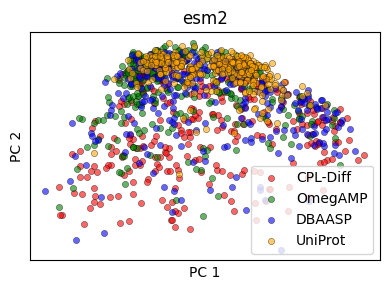

In [ ]:
plot_pca(embeddings.values(), list(embeddings.keys()), colors, title=embedder_name)

### T-SNE


Let's do a T-SNE plot.


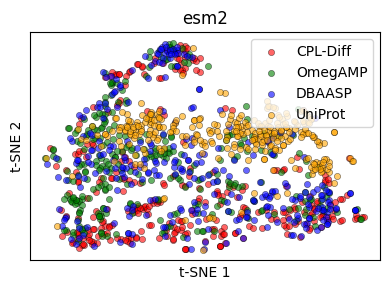

In [ ]:
plot_tsne(embeddings.values(), list(embeddings.keys()), colors, title=embedder_name)

### UMAP


Let's do a UMAP plot.


/Users/rasmus.larsen/work/hackathon-2025/pepme/.conda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


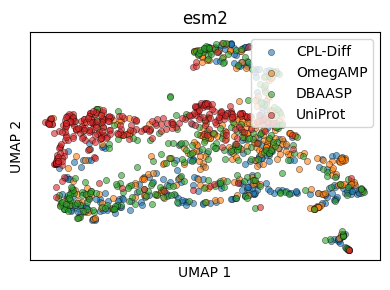

In [ ]:
plot_umap(embeddings.values(), list(embeddings.keys()), title=embedder_name)

### Embedding + Property


Let's do an UMAP for a single list of sequences and color those sequences based on a property.


/Users/rasmus.larsen/work/hackathon-2025/pepme/.conda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


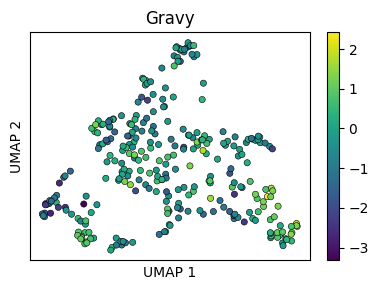

In [ ]:
name = "OmegAMP"
property_model = Gravy()

plot_umap(embeddings[name][None, :], property_values=property_model(datasets_to_plot[name]), title="Gravy", alpha=1.0)